# Mask R-CNN - Test on NewShapes Dataset 
### With placing objects in unexpected locations 

Run the Mask R-CNN net in inference mode, with the additional PCILayer that generates the context-based tensor 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import tensorflow as tf
import keras.backend as KB
import numpy as np
from mrcnn.datagen     import data_generator, load_image_gt
from mrcnn.callbacks   import get_layer_output_1,get_layer_output_2
from mrcnn.utils       import mask_string
import mrcnn.visualize as visualize
import random
from mrcnn.utils import log
from mrcnn.prep_notebook import prep_newshapes_test
import pprint
pp = pprint.PrettyPrinter(indent=2, width=100)


model_file  = 'E:\\Models\\newshape_fcn\\\mask_rcnn_shapes_0351.h5'
folder_name = 'newshape_fcn'
model, dataset_test, test_generator, inference_config = prep_newshapes_test(init_with = model_file, FCN_layers = True, batch_sz = 1, folder_name = folder_name)

D:\Program Files\Anaconda3\envs\TF_gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


 windows  Windows
Tensorflow Version: 1.6.0   Keras Version : 2.1.4 
 Initialize config object - super
(56, 56)
 Min Shapes Per Image:  1
 Max Shapes Per Image:  15
>>> Initialize model WITHOUT MASKING LAYERS!!!!
    set_log_dir: Checkpoint path set to : E:\models\newshape_fcn\shapes20180622T1324\mask_rcnn_shapes_{epoch:04d}.h5
    set_log_dir: self.epoch set to 0 

>>> Resnet Graph 
     Input_image shape : (?, 128, 128, 3)
     After ZeroPadding2D  : (?, 134, 134, 3) (?, 134, 134, 3)
     After Conv2D padding : (?, 64, 64, 64) (?, 64, 64, 64)
     After BatchNorm      : (?, 64, 64, 64) (?, 64, 64, 64)
     C1 Shape: (?, 32, 32, 64) (?, 32, 32, 64)
     C2 Shape:  (?, 32, 32, 256) (?, 32, 32, 256)
     C3 Shape:  (?, 16, 16, 512) (?, 16, 16, 512)
     C4 Shape:  (?, 8, 8, 1024) (?, 8, 8, 1024)
     C5 Shape:  (?, 4, 4, 2048) (?, 4, 4, 2048)

>>> Feature Pyramid Network (FPN) Graph 
     FPN P2 shape : (None, 32, 32, 256)
     FPN P3 shape : (None, 16, 16, 256)
     FPN P4 shape : (Non

    fcn_scores  final shape :  (?, ?, ?, ?)  Keras tensor  False
    complete

    Output build_fcn_score 
     pred_heatmap_norm  :  (?, ?, ?, ?) Keras tensor  False
     complete
 self.keras_model.losses :  0
[]

>>> MODIFIED MaskRCNN build complete -- WITHOUT MASKING LAYERS!!!!
>>> MODIFIED MaskRCNN initialization complete -- WITHOUT MASKING LAYERS!!!!
 COCO Model Path       :  E:\models\mask_rcnn_coco.h5
 Checkpoint folder Path:  E:\models\newshape_fcn
 Model Parent Path     :  E:\models
 Resent Model Path     :  E:\models\resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
-----------------------------------------------
 Load model with init parm:  E:\Models\newshape_fcn\\mask_rcnn_shapes_0351.h5
 Eclude layers: 
None
-----------------------------------------------
Loading weights from  E:\Models\newshape_fcn\\mask_rcnn_shapes_0351.h5
>>> load_weights()
    load_weights: Loading weights from: E:\Models\newshape_fcn\\mask_rcnn_shapes_0351.h5



--------------------
 List of all La

    load_weights: Log directory set to : E:\Models\newshape_fcn\\mask_rcnn_shapes_0351.h5
    set_log_dir: Checkpoint path set to : E:\models\newshape_fcn\shapes20180622T1324\mask_rcnn_shapes_{epoch:04d}.h5
    set_log_dir: self.epoch set to 0 
    Load weights complete :  E:\Models\newshape_fcn\\mask_rcnn_shapes_0351.h5
Load weights complete E:\Models\newshape_fcn\\mask_rcnn_shapes_0351.h5

Configuration Parameters:
-------------------------
BACKBONE_SHAPES                [[32 32]
 [16 16]
 [ 8  8]
 [ 4  4]
 [ 2  2]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.1
DETECTION_NMS_THRESHOLD        0.3
EPOCHS_TO_RUN                  0
FCN_INPUT_SHAPE                [128 128]
GPU_COUNT                      1
IMAGES_PER_GPU                 1
IMAGE_BUFFER                   20
IMAGE_MAX_DIM                  128
IMAGE_MIN_DIM                 

In [2]:
from matplotlib import pyplot as plt
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Detection

### Test on a random image

In [128]:
image_id = random.choice(dataset_test.image_ids)

### 1- Display Original Image

Image Id : 1585
{ 'bg_color': array([126, 253, 245]),
  'height': 128,
  'id': 1585,
  'path': None,
  'shapes': [ ('sun', (32, 81, 240), (72, 19, 8, 8)),
              ('cloud', (74, 212, 252), (74, 20, 15, 3)),
              ('cloud', (78, 234, 58), (100, 23, 21, 4)),
              ('cloud', (64, 67, 30), (25, 24, 23, 4)),
              ('cloud', (115, 153, 148), (57, 29, 33, 6)),
              ('tree', (41, 131, 93), (45, 49, 9, 9)),
              ('building', (215, 186, 206), (75, 53, 12, 15)),
              ('tree', (56, 8, 171), (91, 54, 10, 10)),
              ('person', (75, 162, 223), (84, 66, 2, 10)),
              ('building', (98, 189, 59), (21, 73, 17, 24)),
              ('tree', (213, 92, 222), (32, 101, 22, 22)),
              ('person', (102, 134, 57), (30, 101, 3, 18)),
              ('sun', (228, 236, 53), (100, 120, 12, 12))],
  'source': 'shapes',
  'width': 128}

 shape list --------------------------
 1: person   2: car  3: sun  4: building  5: tree  6: cloud 


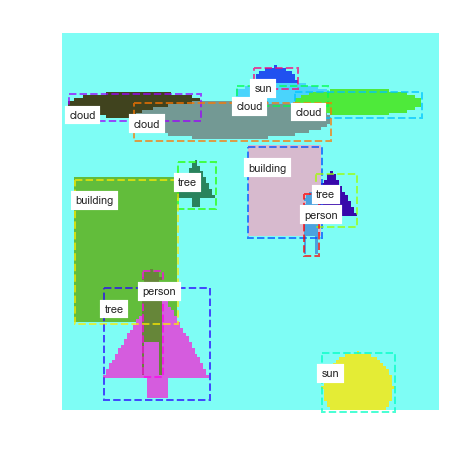

In [156]:
# image_id = 2405
image_id = 1585
#image_id = 1071
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    load_image_gt(dataset_test, inference_config, image_id, use_mini_mask=False)
    

print('Image Id :', image_id)    
pp.pprint(dataset_test.image_info[image_id])

shape_list = dataset_test.image_info[image_id]['shapes']
print('\n shape list --------------------------')
# pp.pprint(shape_list)
# log("original_image", original_image)
# log("image_meta", image_meta)
# log("gt_class_id", gt_bbox)
# log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)
# print(gt_bbox.shape, gt_class_id.shape)
print(" 1: person   2: car  3: sun  4: building  5: tree  6: cloud ")
visualize.display_instances(original_image, gt_bbox,   gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

###  2-  Predict and Visualize model prediction

Processing 1 images
image                    shape: (128, 128, 3)         min:    8.00000  max:  253.00000
molded_images            shape: (1, 128, 128, 3)      min: -108.80000  max:  148.10000
image_metas              shape: (1, 15)               min:    0.00000  max:  128.00000
    Wrapper for Detection Layer : call()  <class 'list'> 4
     rpn_proposals_roi  : (1, ?, ?) (1, 1000, 4) <class 'numpy.ndarray'>
     mrcnn_class.shape  : (?, 1000, 7) (1, 1000, 7) <class 'numpy.ndarray'>
     mrcnn_bboxes.shape : (?, 1000, 7, 4) (1, 1000, 7, 4) <class 'numpy.ndarray'>
     image_meta         : (?, ?) (1, 15) <class 'numpy.ndarray'>
    return from  predict()
    Length of detections :  1

  class ids  :  [5 4 5 4 5 6 6 6 3 1 1 5] <class 'numpy.ndarray'>
  class names:  ['BG', 'person', 'car', 'sun', 'building', 'tree', 'cloud']
  scores     :  [1.     1.     1.     0.9999 0.9999 0.9999 0.9997 0.9995 0.9976 0.997  0.9719 0.9443] <class 'numpy.ndarray'>
--------------------------------------

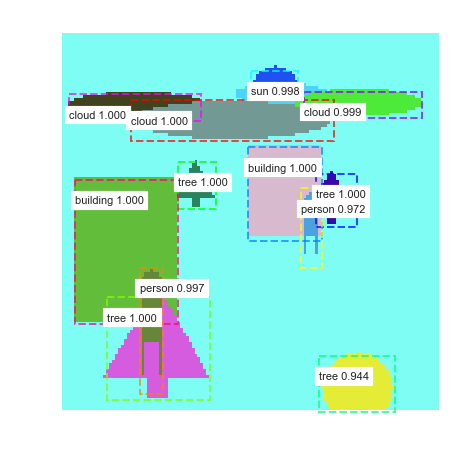

In [158]:
results = model.detect([original_image], verbose=1)

np.set_printoptions(precision=4, threshold=10000, linewidth=250, suppress=True)
# print(results[0].keys())
# print(results[0]['rois'])
# print(results[0]['scores'])
# print(results[0]['fcn_scores'][:,0])
# print(results[0]['pre_scores'][:,0])
r = results[0]

print('  class ids  : ', r['class_ids'], type(r['class_ids']))
print('  class names: ', dataset_test.class_names)
print('  scores     : ', r['scores'], type(r['scores']))


print('------------------------------------------------------------------------------------')
print('                           mrcnn   pre_scr   fcn_scr    % score   fcn_scr   fcn_scr')
print('cls_id    class name       score                         incrs     norm     L2 norm')
print('------------------------------------------------------------------------------------')

for c,s,fcn,pre, roi in zip(r['class_ids'], r['scores'],r['fcn_scores'],r['pre_scores'],r['rois']):
    print(' {:4d}      {:12s}   {:.4f}   {:.4f}    {:.4f}    {:7.4f}    {:.4f}    {:.4f}   {}'.
          format(c,cls_nms[c],s,pre[0],fcn[0],(fcn[0]-pre[0])/pre[0],fcn[1],fcn[2],roi))

    
visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())

### 3.a - Remove last shape in image

In [134]:
dataset_test.image_info[image_id]['shapes'].pop()
pp.pprint(dataset_test.image_info[image_id])

{ 'bg_color': array([111,  81,  30]),
  'height': 128,
  'id': 1071,
  'path': None,
  'shapes': [ ('sun', (89, 30, 56), (69, 22, 9, 9)),
              ('cloud', (57, 173, 133), (28, 27, 29, 7)),
              ('building', (74, 75, 116), (91, 50, 11, 13)),
              ('car', (112, 37, 203), (65, 84, 21, 10)),
              ('person', (129, 113, 121), (85, 86, 3, 15))],
  'source': 'shapes',
  'width': 128}


###  3.b - Manpulate Image

In [135]:
color = tuple([random.randint(0, 255) for _ in range(3)])
# dims  = (10,110,20,8)
# -- add sun in bottom right 
# obj = ('sun', (228, 236, 53), (100, 120, 12, 12))

# sun_obj = ('sun', (228, 236, 53), (100, 115, 12, 12))
# -- add car to top area
# obj = ('car', (64, 67, 30), (25,5,15,10))

# add car to bottom right area
# obj = ('car',   , (103,120,15,10))
# shape = "car"

# color, dims =dataset_test.random_shape("sun", 128,128)
 
# dims= (25,110,10,15)
# shape = "building"

# dataset_test.image_info[image_id]['shapes'].append((shape, color, dims))
dataset_test.image_info[image_id]['shapes'].append(obj)

###  3.c Display Maniplulated Image

Image Id : 1071
{ 'bg_color': array([111,  81,  30]),
  'height': 128,
  'id': 1071,
  'path': None,
  'shapes': [ ('sun', (89, 30, 56), (69, 22, 9, 9)),
              ('cloud', (57, 173, 133), (28, 27, 29, 7)),
              ('building', (74, 75, 116), (91, 50, 11, 13)),
              ('car', (112, 37, 203), (65, 84, 21, 10)),
              ('person', (129, 113, 121), (85, 86, 3, 15)),
              ('car', (64, 67, 30), (25, 5, 15, 10))],
  'source': 'shapes',
  'width': 128}
[3 6 4 2 1 2]
[[ 13  60  32  79]
 [ 20   0  35  58]
 [ 37  80  64 103]
 [ 74  44  92  82]
 [ 68  82  99  89]
 [  0  10  12  41]]

 shape list --------------------------
 1: person   2: car  3: sun  4: building  5: tree  6: cloud 


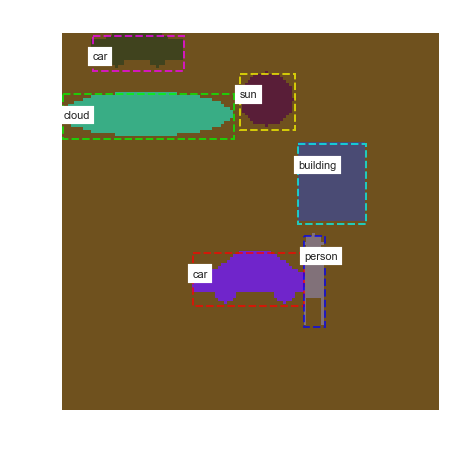

In [136]:
# image_id = random.choice(dataset_test.image_ids)
# image_id = 1585
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    load_image_gt(dataset_test, inference_config, image_id, use_mini_mask=False)
print('Image Id :', image_id)    
pp.pprint(dataset_test.image_info[image_id])

shape_list = dataset_test.image_info[image_id]['shapes']
print(gt_class_id)
print(gt_bbox)
print('\n shape list --------------------------')
print(" 1: person   2: car  3: sun  4: building  5: tree  6: cloud ")

visualize.display_instances(original_image, gt_bbox,   gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

### 4 -  Re-predict and Visualize model prediction

  class ids  :  [6 2 4 3 1 6 6] <class 'numpy.ndarray'>
  class names:  ['BG', 'person', 'car', 'sun', 'building', 'tree', 'cloud']
  scores     :  [1.     1.     0.9999 0.9999 0.9998 0.9172 0.7029] <class 'numpy.ndarray'>
------------------------------------------------------------------------------------
                           mrcnn   pre_scr   fcn_scr    % score   fcn_scr   fcn_scr
cls_id    class name       score                         incrs     norm     L2 norm
------------------------------------------------------------------------------------
    6      cloud          1.0000   0.0641    0.3775     4.8927    0.6998    0.4854   [20  0 35 57]
    2      car            1.0000   0.1167    0.6169     4.2850    1.0000    1.0000   [74 44 92 84]
    4      building       0.9999   0.1285    0.6111     3.7555    1.0000    1.0000   [ 37  80  64 103]
    3      sun            0.9999   0.1712    0.6467     2.7764    1.0000    1.0000   [13 60 32 78]
    1      person         0.9998   0.19

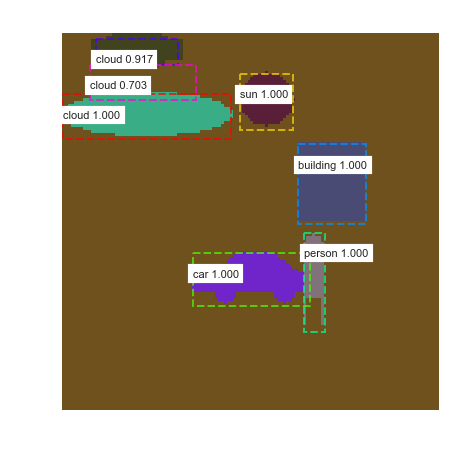

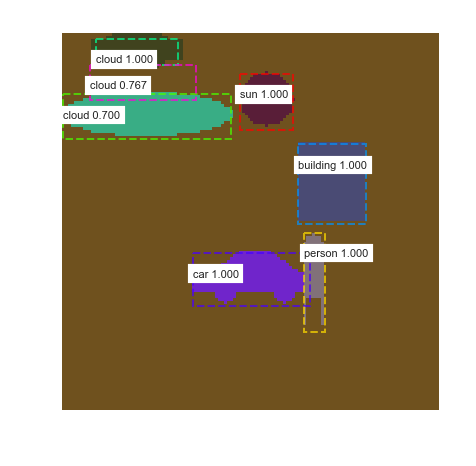

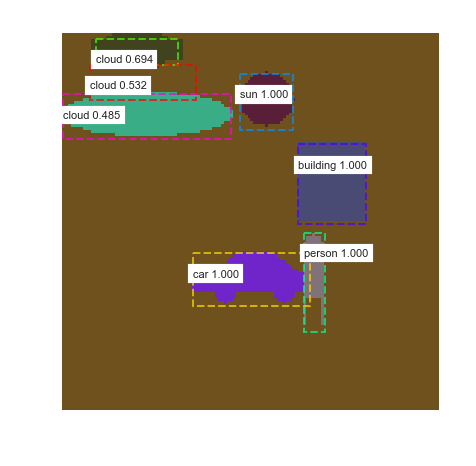

In [139]:
results = model.detect([original_image], verbose=1)
r = results[0]
cls_nms = dataset_test.class_names
print('  class ids  : ', r['class_ids'], type(r['class_ids']))
print('  class names: ', dataset_test.class_names)
print('  scores     : ', r['scores'], type(r['scores']))

print('------------------------------------------------------------------------------------')
print('                           mrcnn   pre_scr   fcn_scr    % score   fcn_scr   fcn_scr')
print('cls_id    class name       score                         incrs     norm     L2 norm')
print('------------------------------------------------------------------------------------')

for c,s,fcn,pre, roi in zip(r['class_ids'], r['scores'],r['fcn_scores'],r['pre_scores'],r['rois']):
    print(' {:4d}      {:12s}   {:.4f}   {:.4f}    {:.4f}    {:7.4f}    {:.4f}    {:.4f}   {}'.
          format(c,cls_nms[c],s,pre[0],fcn[0],(fcn[0]-pre[0])/pre[0],fcn[1],fcn[2],roi))

visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())
visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['fcn_scores'][:,1], ax=get_ax())
visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['fcn_scores'][:,2], ax=get_ax())

### 5.a - Remove last shape in image

In [140]:
dataset_test.image_info[image_id]['shapes'].pop()
pp.pprint(dataset_test.image_info[image_id])

{ 'bg_color': array([111,  81,  30]),
  'height': 128,
  'id': 1071,
  'path': None,
  'shapes': [ ('sun', (89, 30, 56), (69, 22, 9, 9)),
              ('cloud', (57, 173, 133), (28, 27, 29, 7)),
              ('building', (74, 75, 116), (91, 50, 11, 13)),
              ('car', (112, 37, 203), (65, 84, 21, 10)),
              ('person', (129, 113, 121), (85, 86, 3, 15))],
  'source': 'shapes',
  'width': 128}


### 5.b - Add new shape in image

In [141]:
color = tuple([random.randint(0, 255) for _ in range(3)])
# dims  = (10,110,20,8)
# sun bottom right 
# obj = ('sun', color, (100,115,12,12))
 
#--- move car lower    
obj = ('car', (64, 67, 30), (25,10,15,10))
# add car to bottom right area
# obj = ('car',(64, 67, 30), (103,120,15,10))
# color, dims =dataset_test.random_shape("sun", 128,128)
 
# obj = ("building",   ,(25,110,10,15))

# dataset_test.image_info[image_id]['shapes'].append((shape, color, dims))
dataset_test.image_info[image_id]['shapes'].append(obj)

###  5.c Display Maniplulated Image

Image Id : 1071

 shape list --------------------------
[ ('sun', (89, 30, 56), (69, 22, 9, 9)),
  ('cloud', (57, 173, 133), (28, 27, 29, 7)),
  ('building', (74, 75, 116), (91, 50, 11, 13)),
  ('car', (112, 37, 203), (65, 84, 21, 10)),
  ('person', (129, 113, 121), (85, 86, 3, 15)),
  ('car', (64, 67, 30), (25, 10, 15, 10))]
[[ 13  60  32  79]
 [ 20   0  35  58]
 [ 37  80  64 103]
 [ 74  44  92  82]
 [ 68  82  99  89]
 [  0  10  17  41]]
 1: person   2: car  3: sun  4: building  5: tree  6: cloud 


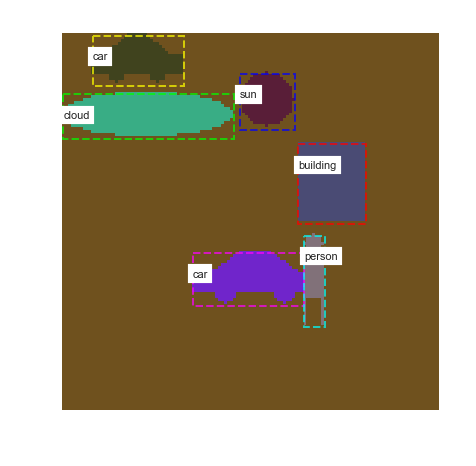

In [142]:
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    load_image_gt(dataset_test, inference_config, image_id, use_mini_mask=False)
    

print('Image Id :', image_id)    
# pp.pprint(dataset_test.image_info[image_id])

shape_list = dataset_test.image_info[image_id]['shapes']
print('\n shape list --------------------------')
pp.pprint(shape_list)
print(gt_bbox)

print(" 1: person   2: car  3: sun  4: building  5: tree  6: cloud ")
visualize.display_instances(original_image, gt_bbox,   gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

###  6 - Re-predict and Visualize model prediction

------------------------------------------------------------------------------------
                           mrcnn   pre_scr   fcn_scr    % score   fcn_scr   fcn_scr
cls_id    class name       score                         incrs     norm     L2 norm
------------------------------------------------------------------------------------
    6      cloud          1.0000   0.0667    0.3643     4.4653    0.8493    0.6473   [20  0 35 58]
    2      car            1.0000   0.0830    0.5837     6.0321    0.9188    0.6766   [74 44 92 84]
    4      building       1.0000   0.1297    0.5723     3.4115    1.0000    1.0000   [ 37  80  63 103]
    3      sun            0.9999   0.1712    0.5745     2.3553    1.0000    1.0000   [13 60 32 78]
    1      person         0.9998   0.2013    0.4013     0.9939    1.0000    1.0000   [ 67  82 100  89]
    2      car            0.7189   0.1631    0.6352     2.8937    1.0000    0.7364   [ 1 13 15 39]
    5      tree           0.6281   0.1807    0.2871     0.58

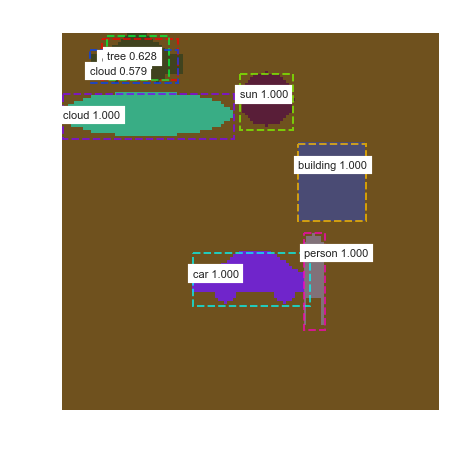

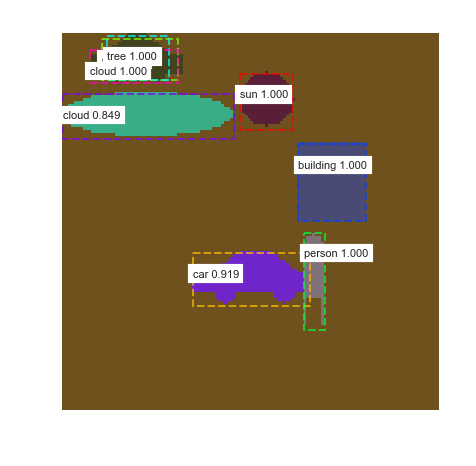

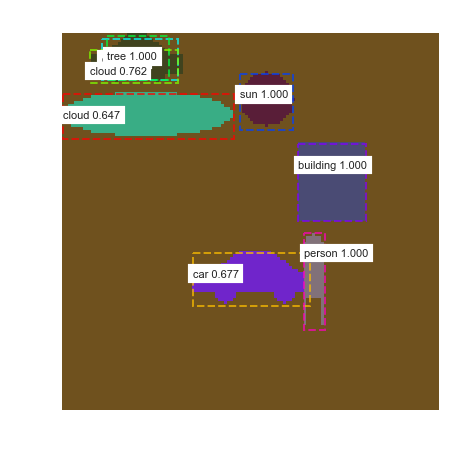

In [145]:

results = model.detect([original_image], verbose=1)
r = results[0]
cls_nms = dataset_test.class_names
# print('  class ids  : ', r['class_ids'], type(r['class_ids']))
# print('  class names: ', dataset_test.class_names)
# print('  scores     : ', r['scores'], type(r['scores']))

print('------------------------------------------------------------------------------------')
print('                           mrcnn   pre_scr   fcn_scr    % score   fcn_scr   fcn_scr')
print('cls_id    class name       score                         incrs     norm     L2 norm')
print('------------------------------------------------------------------------------------')


for c,s,fcn,pre, roi in zip(r['class_ids'], r['scores'],r['fcn_scores'],r['pre_scores'],r['rois']):
    print(' {:4d}      {:12s}   {:.4f}   {:.4f}    {:.4f}    {:7.4f}    {:.4f}    {:.4f}   {}'.
          format(c,cls_nms[c],s,pre[0],fcn[0],(fcn[0]-pre[0])/pre[0],fcn[1],fcn[2],roi))


visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())
visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['fcn_scores'][:,1], ax=get_ax())
visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['fcn_scores'][:,2], ax=get_ax())

###  Remove object - add in new postiion - repredict

{ 'bg_color': array([111,  81,  30]),
  'height': 128,
  'id': 1071,
  'path': None,
  'shapes': [ ('sun', (89, 30, 56), (69, 22, 9, 9)),
              ('cloud', (57, 173, 133), (28, 27, 29, 7)),
              ('building', (74, 75, 116), (91, 50, 11, 13)),
              ('car', (112, 37, 203), (65, 84, 21, 10)),
              ('person', (129, 113, 121), (85, 86, 3, 15))],
  'source': 'shapes',
  'width': 128}
Image Id : 1071
{ 'bg_color': array([111,  81,  30]),
  'height': 128,
  'id': 1071,
  'path': None,
  'shapes': [ ('sun', (89, 30, 56), (69, 22, 9, 9)),
              ('cloud', (57, 173, 133), (28, 27, 29, 7)),
              ('building', (74, 75, 116), (91, 50, 11, 13)),
              ('car', (112, 37, 203), (65, 84, 21, 10)),
              ('person', (129, 113, 121), (85, 86, 3, 15)),
              ('car', (64, 67, 30), (25, 40, 15, 10))],
  'source': 'shapes',
  'width': 128}
[3 6 4 2 1 2]
[[ 13  60  32  79]
 [ 20   0  35  58]
 [ 37  80  64 103]
 [ 74  44  92  82]
 [ 68  82  99

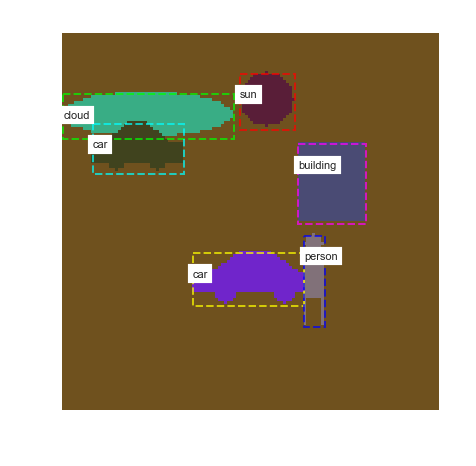

In [148]:
dataset_test.image_info[image_id]['shapes'].pop()
pp.pprint(dataset_test.image_info[image_id])
#--- move car lower    
obj = ('car', (64, 67, 30), (25,40,15,10))
# add car to bottom right area
# obj = ('car',(64, 67, 30), (103,120,15,10))
# color, dims =dataset_test.random_shape("sun", 128,128)
 
# obj = ("building",   ,(25,110,10,15))

# dataset_test.image_info[image_id]['shapes'].append((shape, color, dims))
dataset_test.image_info[image_id]['shapes'].append(obj)

original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    load_image_gt(dataset_test, inference_config, image_id, use_mini_mask=False)
print('Image Id :', image_id)    
pp.pprint(dataset_test.image_info[image_id])
shape_list = dataset_test.image_info[image_id]['shapes']
print(gt_class_id)
print(gt_bbox)
print('\n shape list --------------------------')
print(" 1: person   2: car  3: sun  4: building  5: tree  6: cloud ")

visualize.display_instances(original_image, gt_bbox,   gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

###  Repredict and Visualize model prediction

Processing 1 images
image                    shape: (128, 128, 3)         min:   30.00000  max:  203.00000
molded_images            shape: (1, 128, 128, 3)      min:  -86.80000  max:   99.10000
image_metas              shape: (1, 15)               min:    0.00000  max:  128.00000
    Wrapper for Detection Layer : call()  <class 'list'> 4
     rpn_proposals_roi  : (1, ?, ?) (1, 1000, 4) <class 'numpy.ndarray'>
     mrcnn_class.shape  : (?, 1000, 7) (1, 1000, 7) <class 'numpy.ndarray'>
     mrcnn_bboxes.shape : (?, 1000, 7, 4) (1, 1000, 7, 4) <class 'numpy.ndarray'>
     image_meta         : (?, ?) (1, 15) <class 'numpy.ndarray'>
    return from  predict()
    Length of detections :  1

------------------------------------------------------------------------------------
                           mrcnn   pre_scr   fcn_scr    % score   fcn_scr   fcn_scr
cls_id    class name       score                         incrs     norm     L2 norm
-----------------------------------------------------

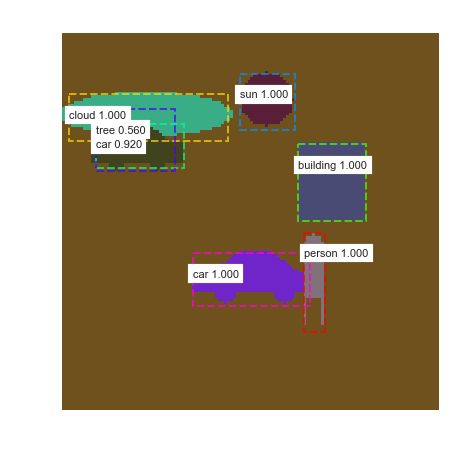

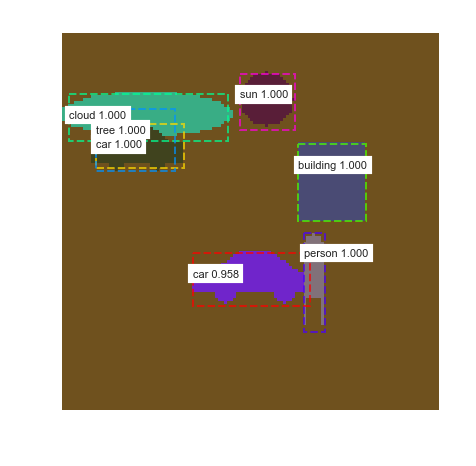

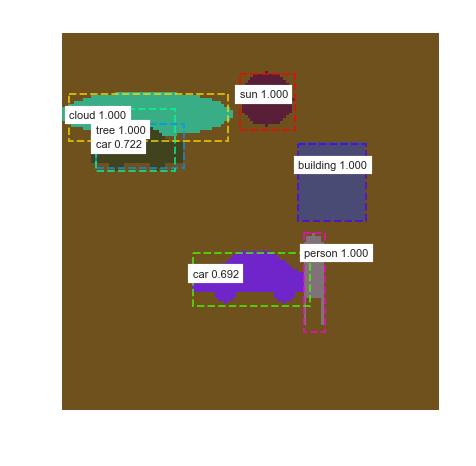

In [149]:
results = model.detect([original_image], verbose=1)
r = results[0]
cls_nms = dataset_test.class_names
# print('  class ids  : ', r['class_ids'], type(r['class_ids']))
# print('  class names: ', dataset_test.class_names)
# print('  scores     : ', r['scores'], type(r['scores']))

print('------------------------------------------------------------------------------------')
print('                           mrcnn   pre_scr   fcn_scr    % score   fcn_scr   fcn_scr')
print('cls_id    class name       score                         incrs     norm     L2 norm')
print('------------------------------------------------------------------------------------')


for c,s,fcn,pre, roi in zip(r['class_ids'], r['scores'],r['fcn_scores'],r['pre_scores'],r['rois']):
    print(' {:4d}      {:12s}   {:.4f}   {:.4f}    {:.4f}    {:7.4f}    {:.4f}    {:.4f}   {}'.
          format(c,cls_nms[c],s,pre[0],fcn[0],(fcn[0]-pre[0])/pre[0],fcn[1],fcn[2],roi))


visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())
visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['fcn_scores'][:,1], ax=get_ax())
visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['fcn_scores'][:,2], ax=get_ax())

###  Remove object - add in new postiion - repredict (3)

{ 'bg_color': array([111,  81,  30]),
  'height': 128,
  'id': 1071,
  'path': None,
  'shapes': [ ('sun', (89, 30, 56), (69, 22, 9, 9)),
              ('cloud', (57, 173, 133), (28, 27, 29, 7)),
              ('building', (74, 75, 116), (91, 50, 11, 13)),
              ('car', (112, 37, 203), (65, 84, 21, 10)),
              ('person', (129, 113, 121), (85, 86, 3, 15))],
  'source': 'shapes',
  'width': 128}
Image Id : 1071
{ 'bg_color': array([111,  81,  30]),
  'height': 128,
  'id': 1071,
  'path': None,
  'shapes': [ ('sun', (89, 30, 56), (69, 22, 9, 9)),
              ('cloud', (57, 173, 133), (28, 27, 29, 7)),
              ('building', (74, 75, 116), (91, 50, 11, 13)),
              ('car', (112, 37, 203), (65, 84, 21, 10)),
              ('person', (129, 113, 121), (85, 86, 3, 15)),
              ('car', (64, 67, 30), (25, 50, 15, 10))],
  'source': 'shapes',
  'width': 128}
[3 6 4 2 1 2]
[[ 13  60  32  79]
 [ 20   0  35  58]
 [ 37  80  64 103]
 [ 74  44  92  82]
 [ 68  82  99

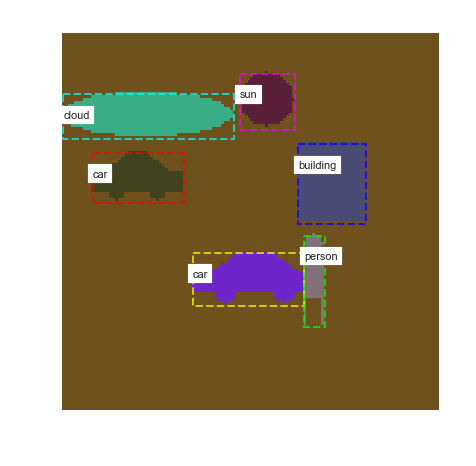

In [154]:
dataset_test.image_info[image_id]['shapes'].pop()
pp.pprint(dataset_test.image_info[image_id])
#--- move car lower    
obj = ('car', (64, 67, 30), (25,50,15,10))
# add car to bottom right area
# obj = ('car',(64, 67, 30), (103,120,15,10))
# color, dims =dataset_test.random_shape("sun", 128,128)
 
# obj = ("building",   ,(25,110,10,15))

# dataset_test.image_info[image_id]['shapes'].append((shape, color, dims))
dataset_test.image_info[image_id]['shapes'].append(obj)

original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    load_image_gt(dataset_test, inference_config, image_id, use_mini_mask=False)
print('Image Id :', image_id)    
pp.pprint(dataset_test.image_info[image_id])
shape_list = dataset_test.image_info[image_id]['shapes']
print(gt_class_id)
print(gt_bbox)
print('\n shape list --------------------------')
print(" 1: person   2: car  3: sun  4: building  5: tree  6: cloud ")

visualize.display_instances(original_image, gt_bbox,   gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

###  Repredict and Visualize model prediction

Processing 1 images
image                    shape: (128, 128, 3)         min:   30.00000  max:  203.00000
molded_images            shape: (1, 128, 128, 3)      min:  -86.80000  max:   99.10000
image_metas              shape: (1, 15)               min:    0.00000  max:  128.00000
    Wrapper for Detection Layer : call()  <class 'list'> 4
     rpn_proposals_roi  : (1, ?, ?) (1, 1000, 4) <class 'numpy.ndarray'>
     mrcnn_class.shape  : (?, 1000, 7) (1, 1000, 7) <class 'numpy.ndarray'>
     mrcnn_bboxes.shape : (?, 1000, 7, 4) (1, 1000, 7, 4) <class 'numpy.ndarray'>
     image_meta         : (?, ?) (1, 15) <class 'numpy.ndarray'>
    return from  predict()
    Length of detections :  1

------------------------------------------------------------------------------------
                           mrcnn   pre_scr   fcn_scr    % score   fcn_scr   fcn_scr
cls_id    class name       score                         incrs     norm     L2 norm
-----------------------------------------------------

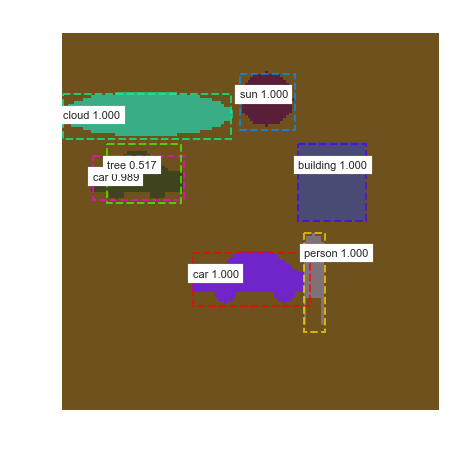

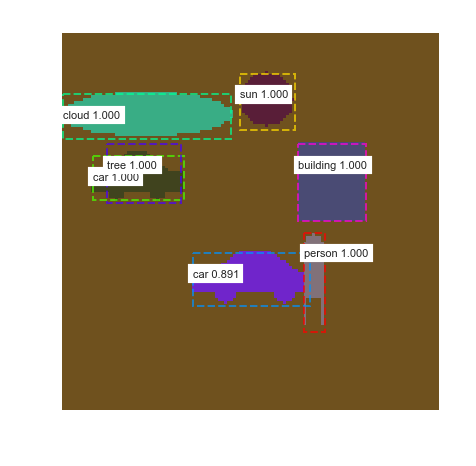

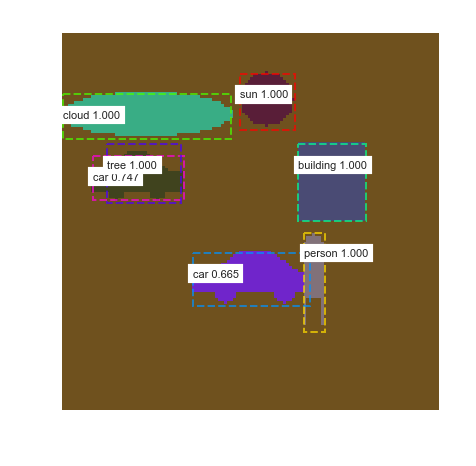

In [155]:
results = model.detect([original_image], verbose=1)
r = results[0]
cls_nms = dataset_test.class_names
# print('  class ids  : ', r['class_ids'], type(r['class_ids']))
# print('  class names: ', dataset_test.class_names)
# print('  scores     : ', r['scores'], type(r['scores']))

print('------------------------------------------------------------------------------------')
print('                           mrcnn   pre_scr   fcn_scr    % score   fcn_scr   fcn_scr')
print('cls_id    class name       score                         incrs     norm     L2 norm')
print('------------------------------------------------------------------------------------')


for c,s,fcn,pre, roi in zip(r['class_ids'], r['scores'],r['fcn_scores'],r['pre_scores'],r['rois']):
    print(' {:4d}      {:12s}   {:.4f}   {:.4f}    {:.4f}    {:7.4f}    {:.4f}    {:.4f}   {}'.
          format(c,cls_nms[c],s,pre[0],fcn[0],(fcn[0]-pre[0])/pre[0],fcn[1],fcn[2],roi))


visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())
visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['fcn_scores'][:,1], ax=get_ax())
visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['fcn_scores'][:,2], ax=get_ax())

In [ ]:
np.set_printoptions(precision=4, threshold=10000, linewidth=250, suppress=True)
# fcn_scrs = results[0]['fcn_scores']
# print(fcn_scrs[:,:,:10])
# mrcnn_scrs = results[0]['mrcnn_scores']
# print(mrcnn_scrs[:,:,:10])

In [ ]:
  'shapes': [ ('sun', (32, 81, 240), (72, 19, 8, 8)),
              ('cloud', (74, 212, 252), (74, 20, 15, 3)),
              ('cloud', (78, 234, 58), (100, 23, 21, 4)),
              ('cloud', (64, 67, 30), (25, 24, 23, 4)),
              ('cloud', (115, 153, 148), (57, 29, 33, 6)),
              ('tree', (41, 131, 93), (45, 49, 9, 9)),
              ('building', (215, 186, 206), (75, 53, 12, 15)),
              ('tree', (56, 8, 171), (91, 54, 10, 10)),
              ('person', (75, 162, 223), (84, 66, 2, 10)),
              ('building', (98, 189, 59), (21, 73, 17, 24)),
              ('tree', (213, 92, 222), (32, 101, 22, 22)),
              ('person', (102, 134, 57), (30, 101, 3, 18)),
              ('car', (89, 238, 118), (25, 10, 15, 10))],

In [ ]:
r = results[0]

print('  class ids  : ', r['class_ids'], type(r['class_ids']))
print('  class names: ', dataset_test.class_names)
print('  scores     : ', r['scores'], type(r['scores']))
visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())

visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['fcn_scores'][:,1], ax=get_ax())
visualize.display_instances(original_image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['fcn_scores'][:,2], ax=get_ax())

###  Display `gauss_heatmap` 3D heatmap (not normalized, normlized, L2 normalized)

In [ ]:
from mrcnn.visualize import plot_3d_heatmap, plot_2d_heatmap
%matplotlib inline
print('Image id: ',image_id , '    Classes (1: circle, 2: square, 3: triangle ): ')

fcn_heatmap_norm = []
pred_heatmap_norm = []
img = 0
cls = 0
# print(pred_heatmap_scores[img,cls,:10])
fcn_heatmap_norm.append(results[0]['fcn_hm_norm'][0])
pred_heatmap_norm.append(results[0]['pr_hm_norm'][0])
print(pred_heatmap_norm[0].shape)
# ttl = 'Non-normalized - image: {}'.format(img)
# plot_3d_heatmap(pred_heatmap[img], title = ttl, width = 20)
ttl = 'Pre FCN - Normalized'.format(img)
plot_3d_heatmap(pred_heatmap_norm[img], title = ttl, width = 20,class_names = dataset_test.class_names)

# ttl = 'Non-normalized - image: {}'.format(img)
# plot_3d_heatmap(fcn_heatmap[img], title = ttl, width = 20)
ttl = 'Post FCN - Normalized'.format(img)
plot_3d_heatmap(fcn_heatmap_norm[img], title = ttl, width = 20,class_names = dataset_test.class_names)

# ttl = 'Ground Truth Non-normalized - image: {}'.format(img)
# plot_3d_heatmap(gt_heatmap[img], title = ttl, width = 20)
# ttl = 'Ground Truth Normalized - image: {}'.format(img)
# plot_3d_heatmap(gt_heatmap_norm[img], title = ttl, width = 20)


# ttl = 'Non-normalized - image: {}'.format(img)
# plot_2d_heatmap(pred_heatmap[img], pred_heatmap_scores[img], width=15, title=ttl)
# ttl = 'Normalized - image: {}'.format(img)
# plot_2d_heatmap(pred_heatmap_norm[img], pred_heatmap_scores[img], width=15, title=ttl)


####  Display `pred_heatmap` / `fcn_heatmap` (not normalized, normlized)

In [ ]:
from mrcnn.visualize import plot_2d_heatmap
%matplotlib inline
# print('Image id: ',image_id , '    Classes (1: circle, 2: square, 3: triangle ): ')
img = 0
fcn_heatmap_scores = []
pred_heatmap_scores = []
img = 0
cls = 0
# print(pred_heatmap_scores[img,cls,:10])
fcn_heatmap_scores.append(results[0]['fcn_scores'][0])
pred_heatmap_scores.append(results[0]['pr_scores'][0])
# print(pred_heatmap_scores[img,0,0])
plot_2d_heatmap(pred_heatmap_norm[img], pred_heatmap_scores[img], width=19, num_bboxes = 10, title='Pre FCN-normalized',class_names = dataset_test.class_names)
# plot_2d_heatmap(pred_heatmap_norm[img], pred_heatmap_scores[img], width=19, num_bboxes = 10, title='normalized')
plot_2d_heatmap(fcn_heatmap_norm[img], fcn_heatmap_scores[img], width=19, num_bboxes = 10,  title='FCN-normalized',class_names = dataset_test.class_names)
# plot_heatmaps(pred_heatmap, pred_heatmap_scores, width = 15, num_bboxes=12)

In [ ]:
dataset_test.class_names

In [ ]:
p1 = results[0]['pr_scores'][0]
p2 = results[0]['fcn_scores'][0]
rois = results[0]['rois']
print(p1.shape, p2.shape)
# p2_shape = p2.shape
p3 = np.reshape(p2, (-1,p2.shape[-1]))
print(p3.shape)
# print(p3[301:600])
zero_ix = np.where(p3[:, 4] != 0)[0]

In [ ]:
np.set_printoptions(precision=4, threshold=10000, linewidth=250, suppress=True)
print(type(zero_ix), len(zero_ix), zero_ix.shape)
print(p3[zero_ix,:])
print(rois)
print(results[0]['class_ids'])
p4 = p3[p3[:,5].argsort()[::-1]]
print(p4[:20])

## Evaluation

In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
from mrcnn.datagen     import data_generator, load_image_gt
import  mrcnn.utils as utils 

image_ids = np.random.choice(dataset_test.image_ids, 100)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        load_image_gt(dataset_test, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(utils.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id,
                         r["rois"], r["class_ids"], r["scores"])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

### Get next shapes from generator and display loaded shapes

## Save 

In [ ]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, "mask_rcnn_shapes.h5")
model.keras_model.save_weights(model_path)

## Notebook Preferences

In [ ]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Configurations

In [ ]:
# from keras import backend as KB
# if 'tensorflow' == KB.backend():
#     import tensorflow as tf
#     from keras.backend.tensorflow_backend import set_session
#     # tfconfig = tf.ConfigProto(
#         # gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5),
#         # device_count = {'GPU': 1}
#     # )    
#     tfconfig = tf.ConfigProto()
#     tfconfig.gpu_options.allow_growth=True
#     tfconfig.gpu_options.visible_device_list = "0"
#     tfconfig.gpu_options.per_process_gpu_memory_fraction=0.5
#     tf_sess = tf.Session(config=tfconfig)
#     set_session(tf_sess)

###  Simulation of `detect()` routine

In [ ]:
# print('>>> model detect()')
verbose = 1
images  = [original_image]
assert model.mode   == "inference", "Create model in inference mode."
assert len(images) == model.config.BATCH_SIZE, "len(images) must be equal to BATCH_SIZE"

if verbose:
    log("Processing {} images".format(len(images)))
    for image in images:
        log("image", image)

# Mold inputs to format expected by the neural network
molded_images, image_metas, windows = model.mold_inputs(images)
if verbose:
    log("molded_images", molded_images)
    log("image_metas"  , image_metas)

## Run object detection pipeline
# print('    call predict()')
detections, rpn_rois, rpn_class, rpn_bbox,\
            mrcnn_class, mrcnn_bbox, mrcnn_mask \
                      =  model.keras_model.predict([molded_images, image_metas], verbose=0)

print('    return from  predict()')
print('    Length of detections : ', len(detections))
print('    Length of rpn_rois   : ', len(rpn_rois   ))
print('    Length of rpn_class  : ', len(rpn_class  ))
print('    Length of rpn_bbox   : ', len(rpn_bbox   ))
print('    Length of mrcnn_class: ', len(mrcnn_class))
print('    Length of mrcnn_bbox : ', len(mrcnn_bbox ))
print('    Length of mrcnn_mask : ', len(mrcnn_mask ))

####  detection array layout is `[ y1, x1, y2, x2, class, score]`

detections[0].shape
print(detections[0])

## Process detections
results = []
for i, image in enumerate(images):
    final_rois, final_class_ids, final_scores, final_masks =\
        model.unmold_detections(detections[i], 
                               mrcnn_mask[i],
                               image.shape  ,
                               windows[i])
    results.append({
        "rois"     : final_rois,
        "class_ids": final_class_ids,
        "scores"   : final_scores,
        "masks"    : final_masks,
    })